In [174]:
# Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from pprint import pprint
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#import Twitter API keys
from bot_config import access_token,access_token_secret,consumer_key,consumer_secret

In [38]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [176]:
#target_handle
# Search through bot tweets for new handles to analyze
#bot ="@brgrave1_graves"
#public_tweets = api.user_timeline(bot)

#pprint(public_tweets)

In [107]:
print(tweet["in_reply_to_screen_name"])

CNN


In [177]:
#define target search from twitter bots account 
#target_search= ("@brgrave1_graves:@%s" % handle_requested)


# Search for all tweets
#public_tweets=api.status_lookup(target_search,show_user=True)
#pprint(public_tweets)

In [167]:
#scan my account for new analysis to run
def Scan_Account():
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


# Search for all tweets
public_tweets=api.user_timeline()
# Loop through all tweets
for tweet in public_tweets:
    # Get ID and Author of most recent tweet directed to me
    tweet_id = tweet["id"]
    tweet_author = tweet["user"]["screen_name"]
    handle_requested = tweet["in_reply_to_screen_name"]
    # Use Try-Except to avoid the duplicate error
    try:
        # Respond to tweet & perform sentiment analysis
        target_handle = ("@%s" % handle_requested)
        # Counter
        counter = 1
        # Variables for holding sentiments
        compound_sentiments = []
        tweets_ago = []
        # Loop through 5 pages of tweets (total 100 tweets)
        for x in range(5):
            # Get all tweets from home feed
            public_tweets = api.user_timeline(target_handle)
            # Loop through all tweets 
            for tweet in public_tweets:  
                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                # Add to counter 
                counter = counter + 1
                # Add sentiments for each tweet into an array
                compound_sentiments.append(compound)
                tweets_ago.append(counter)
    except Exception:
        print("Already responded to this one!")
        # Print message if duplicate
         


In [178]:
#creating the chart function
def analysis_chart():
    
    sns.set()

    #creating chart
    plt.plot(tweets_ago, compound_sentiments, linewidth=0.5, marker="o", color="blue")
    # Add labels to the x and y axes
    plt.title("Sentiment Analysis of %s's tweets" % target_handle)
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    #adding legend
    legend = ("%s's tweets" % tweet_author)
    plt.legend(legend, bbox_to_anchor=(1.1, 1), 
              fancybox=True, shadow=True, ncol=1, loc='upper center', title="Tweets")
    # Set a grid on the plot
    plt.grid(True)
    # Add a semi-transparent horizontal line at y = 0
    plt.hlines(0, 0, 10, alpha=0.9)
    plt.savefig("Sentiment Analysis of tweets.jpg")

    # tweet analysis back to twitter 
    api.update_with_media("Sentiment Analysis of tweets.jpg")
                          
    

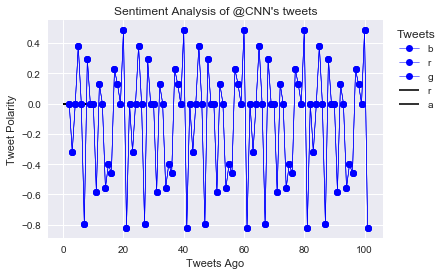

In [179]:
counter = 0
for counter in range(3):
    analysis_chart()
    time.sleep(60)


In [ ]:
#scan my account for new analysis to run
def Scan_Account():
    # Setup Tweepy API Authentication
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
    
    # Search for all tweets
    bot_tweets = api.search(bot, count=100, result_type="recent")
    # Loop through all tweets
    for tweet in bot_tweets["statuses"]:
        # Get ID and Author of most recent tweet directed to me
        tweet_id = tweet["id"]
        tweet_author = tweet["user"]["screen_name"]
        #create loop to check if analysis has been run on the target_handle by looping through ayalysis_already_run
        for tweet_author in handles_analyzed:
            if tweet_author == handles_analzyed:
                #tweet submitter of analysis this analysis has already been run
                api.udate_status("Sentiment Analysis has already beeen performed on @%s! Please feel free to submit another"
                                 % tweet_author, reply_to_id=tweet_id)
            else:
                #add handle to list of analyzed twitter handles to not clutter timeline
                handles_analyzed.append(tweet_author)
      #perform sentiment analysis
                target_handle = ("@%s!" % tweet_author)
                # Counter
                counter = 1
                # Variables for holding sentiments
                handle_sentiments = []
                # Loop through 5 pages of tweets (total 100 tweets)
                for x in range(5):
                    # Get all tweets from home feed
                    public_tweets = api.user_timeline(target_handle)
                    # Loop through all tweets 
                    for tweet in public_tweets:  
                        # Run Vader Analysis on each tweet
                        compound = analyzer.polarity_scores(tweet["text"])["compound"]
                        pos = analyzer.polarity_scores(tweet["text"])["pos"]
                        neu = analyzer.polarity_scores(tweet["text"])["neu"]
                        neg = analyzer.polarity_scores(tweet["text"])["neg"]
                        tweets_ago = counter
                        # Add sentiments for each tweet into an array
                        handle_sentiments.append({"Twitter Handle":target_handle,
                                           "Compound": compound,
                                           "Positive": pos,
                                           "Negative": neu,
                                           "Neutral": neg,
                                           "Tweets Ago": counter})        
                        # Add to counter 
                        counter = counter + 1
            

    
    

In [ ]:
    for handle_requested in handles_analyzed:
        if handle_requested == handle_requested:
            #tweet submitter of analysis this analysis has already been run
            api.udate_status("Sentiment Analysis has already beeen performed on @%s! Please feel free to submit another"
                             % handle_requested,in_reply_to_status_id=tweet_id )
        else:
            #add handle to list of analyzed twitter handles to not clutter timeline
            handles_analyzed.append(handle_requested)

In [ ]:
target_handle = ("@%s" % tweet_author)
# Counter
counter = 1
# Variables for holding sentiments
bbc_sentiments = []
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_handle)
    # Loop through all tweets 
    for tweet in public_tweets:  
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"Media Source":target_handle,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Date": tweet["created_at"],
                           "Tweets Ago": counter,
                            "Tweet": tweet["text"]})        
        # Add to counter 
        counter = counter + 1

In [ ]:

#perform sentiment analysis
target_handle = ("@%s" % handle_requested)
# Counter
counter = 1
# Variables for holding sentiments
compound_sentiments = []
tweets_ago = []
# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_handle)
    # Loop through all tweets 
    for tweet in public_tweets:  
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        # Add to counter 
        counter = counter + 1
        # Add sentiments for each tweet into an array
        compound_sentiments.append(compound)
        tweets_ago.append(counter)

In [ ]:
# Create converse function
def Converse(line_number):

    # Find the latest tweet from conversation_partner
    public_tweets = api.search(conversation_partner, count=1, result_type="recent")
    for tweet in public_tweets["statuses"]:
        print(tweet)

        # Respond to the tweet with one of the response lines
        tweet_id = tweet["id"]
        print(tweet_id)
        print(tweet["text"])
        api.update_status(
            response_lines[line_number],
            in_reply_to_status_id=tweet_id)

In [ ]:
# Create Thank You Function
def ThankYou():

    # Twitter Credentials
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

    # Search for all tweets
    public_tweets = api.search(target_term, count=100, result_type="recent")

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Get ID and Author of most recent tweet directed to me
        tweet_id = tweet["id"]
        tweet_author = tweet["user"]["screen_name"]

        # Print the tweet_id
        print(tweet_id)

        # Use Try-Except to avoid the duplicate error
        try:
            # Respond to tweet
            api.update_status(
                "Thank you @%s! Come again!" %
                tweet_author,
                in_reply_to_status_id=tweet_id)

            # Print success message
            print("Successful response!")

        except Exception:            # Print message if duplicate
            print("Already responded to this one!")

        # Print message to signify complete cycle
        print("We're done for now. I'll check again in 60 seconds.")